<a href="https://colab.research.google.com/github/pea-sys/Til/blob/master/XArray_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

numpy配列をラベル付きで扱えるXArrayライブラリの試し書き  
groupby集計も使える。numpyarrayと速度的にほとんど差がなさそうなので、大規模データには積極的に利用していきたい。  

In [17]:
!pip install xarray
!pip install category_encoders

In [18]:
import numpy as np
import pandas as pd
import xarray as xr
import category_encoders as ce

In [19]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [20]:
oe = ce.OrdinalEncoder(cols='species', drop_invariant=True)
data['species'] = oe.fit_transform(data['species'])
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1


In [21]:
data = data.to_xarray().astype('float32')
data

<xarray.Dataset>
Dimensions:       (index: 150)
Coordinates:
  * index         (index) int64 0 1 2 3 4 5 6 7 ... 143 144 145 146 147 148 149
Data variables:
    sepal_length  (index) float32 5.1 4.9 4.7 4.6 5.0 ... 6.7 6.3 6.5 6.2 5.9
    sepal_width   (index) float32 3.5 3.0 3.2 3.1 3.6 ... 3.0 2.5 3.0 3.4 3.0
    petal_length  (index) float32 1.4 1.4 1.3 1.5 1.4 ... 5.2 5.0 5.2 5.4 5.1
    petal_width   (index) float32 0.2 0.2 0.2 0.2 0.2 ... 2.3 1.9 2.0 2.3 1.8
    species       (index) float32 1.0 1.0 1.0 1.0 1.0 ... 3.0 3.0 3.0 3.0 3.0

In [11]:
data['sepal_length']

<xarray.DataArray 'sepal_length' (index: 150)>
array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], dtype=float32)
Coordinates:
  * index    (index) int64 0 1 2 3 4 5 6 7 8 ... 142 143 144 145 146 147 148 149

In [22]:
data.groupby('species').mean()

<xarray.Dataset>
Dimensions:       (species: 3)
Coordinates:
  * species       (species) float64 1.0 2.0 3.0
Data variables:
    sepal_length  (species) float32 5.006 5.936 6.588
    sepal_width   (species) float32 3.428 2.77 2.974
    petal_length  (species) float32 1.462 4.26 5.552
    petal_width   (species) float32 0.246 1.326 2.026

In [24]:
data.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
1.0,0.348947,0.375255,0.171919,0.104326
2.0,0.510983,0.310645,0.465188,0.195765
3.0,0.629489,0.319255,0.546348,0.271890


In [25]:
data.to_netcdf("saved_on_disk.nc")

In [26]:
xr.open_dataset("saved_on_disk.nc")

<xarray.Dataset>
Dimensions:       (index: 150)
Coordinates:
  * index         (index) int64 0 1 2 3 4 5 6 7 ... 143 144 145 146 147 148 149
Data variables:
    sepal_length  (index) float32 ...
    sepal_width   (index) float32 ...
    petal_length  (index) float32 ...
    petal_width   (index) float32 ...
    species       (index) float32 ...

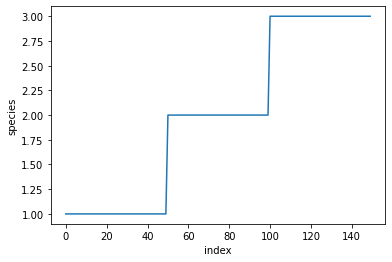

In [28]:
data['species'].plot()